<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">Tipologia y ciclo de vida de los datos · PRA2</p>
<p style="margin: 0; text-align:right;">2020-1 · Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# PRA2: Limpieza y análisis de datos




<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Nombre y apellidos: Mabel Arroyo Adeba</strong>
    
<strong>Fecha: Enero 2021</strong>    
</div>

## 0. Importación de librerias


In [224]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import shapiro
from scipy.stats import fligner
from sklearn.linear_model import LinearRegression
import seaborn as sb

## 1. Descripción del Dataset



In [168]:
# Cargamos el fichero con los datos de los sorteos
# y hacemos una previsualización de la estructura y 
# de las primeras líneas de datos
df_prim = pd.read_csv('Historico_Primitiva.csv',sep  = ';')
print("Número de filas y columnas:", df_prim.shape)
print("Nombres de las columnas:", list(df_prim.columns))
df_prim.head(5)

Número de filas y columnas: (3048, 27)
Nombres de las columnas: ['Indice', 'Fecha_larga', 'Fecha_AAAAMMDD', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'C', 'R', 'Recaudación', 'Bote', 'ACE', 'PCE', 'AC1', 'PC1', 'AC2', 'PC2', 'AC3', 'PC3', 'AC4', 'PC4', 'AC5', 'PC5', 'ACR', 'PCR']


,Indice,Fecha_larga,Fecha_AAAAMMDD,B1,B2,B3,B4,B5,B6,C,...,AC2,PC2,AC3,PC3,AC4,PC4,AC5,PC5,ACR,PCR
0,1,Resultado del sábado 31 de octubre de 2020,20201031,2,13,21,32,41,43,40,...,9,"24.171,37",206,"2.288,07",10.098,"75,40",189.207,"8,00",1.100.069,"1,00"
1,2,Resultado del jueves 29 de octubre de 2020,20201029,1,22,27,34,47,49,11,...,8,"27.236,96",242,"1.950,86",12.297,"62,02",216.703,"8,00",1.194.511,"1,00"
2,3,Resultado del sábado 24 de octubre de 2020,20201024,9,17,24,41,42,47,39,...,3,"70.455,67",193,"2.372,86",9.982,"74,11",186.914,"8,00",1.045.136,"1,00"
3,4,Resultado del jueves 22 de octubre de 2020,20201022,13,17,31,36,39,43,19,...,9,"24.377,58",244,"1.948,21",10.887,"70,53",189.327,"8,00",1.140.605,"1,00"
4,5,Resultado del sábado 17 de octubre de 2020,20201017,1,7,39,40,41,46,33,...,4,"54.461,03",123,"3.837,36",7.562,"100,83",155.685,"8,00",1.099.638,"1,00"


In [169]:
# Cargamos el fichero con los datos del PIB
# y hacemos una previsualización de la estructura y 
# de las primeras líneas de datos
df_pib = pd.read_csv('variacion_anual_del_pib.csv',sep  = ';')
print("Número de filas y columnas:", df_pib.shape)
print("Nombres de las columnas:", list(df_pib.columns))
df_pib.head(5)

Número de filas y columnas: (213, 3)
Nombres de las columnas: ['Año', 'Periodo', 'Variación anual (en %)']


,Año,Periodo,Variación anual (en %)
0,1971,Trimestre 1,"2,8"
1,1971,Trimestre 2,"4,1"
2,1971,Trimestre 3,"5,2"
3,1971,Trimestre 4,"6,3"
4,1972,Trimestre 1,"7,1"


In [170]:
# Miramos las últimas y podemos observar que hay texto adicional
# Este texto carece de sentido como datos, así que borramos manualmente
# El resultado lo grabamos en variacion_anual_del_pib2.csv
df_pib.tail(5)

,Año,Periodo,Variación anual (en %)
208,NaN,NaN,NaN
209,NaN,NaN,NaN
210,"Url:""https://www.epdata.es/pib-tambien-pisa-ac...",NaN,NaN
211,"Titulo:""Variación anual del PIB de España hast...",NaN,NaN
212,"Subtitulo:""Cambio metodológico a partir del pr...",NaN,NaN


In [171]:
# Volvemos a cargar el fichero con los datos del PIB
# y hacemos una previsualización de la estructura y 
# de las primeras líneas de datos
df_pib = pd.read_csv('variacion_anual_del_pib2.csv',sep  = ';')
print("Número de filas y columnas:", df_pib.shape)
print("Nombres de las columnas:", list(df_pib.columns))
df_pib.head(5)

Número de filas y columnas: (199, 3)
Nombres de las columnas: ['Año', 'Periodo', 'Variación anual (en %)']


,Año,Periodo,Variación anual (en %)
0,1971,Trimestre 1,"2,8"
1,1971,Trimestre 2,"4,1"
2,1971,Trimestre 3,"5,2"
3,1971,Trimestre 4,"6,3"
4,1972,Trimestre 1,"7,1"


In [172]:
# Miramos las últimas y podemos observar que ahora ya está correcto
df_pib.tail(5)

,Año,Periodo,Variación anual (en %)
194,2019,Trimestre 3,"1,86"
195,2019,Trimestre 4,"1,78"
196,2020,Trimestre 1,"-4,03"
197,2020,Trimestre 2,"-21,5"
198,2020,Trimestre 3,"-8,7"


## 2. Selección e integración de los datos a analizar

Del fichero de sorteos, los datos que nos interesan son la fecha y la recaudación, es decir 'Fecha_AAAAMMDD' y 'Recaudación'. 

Del fichero del PIB, nos interesan todos los campos.

A continuación realizaremos una selección de datos recogiendo los registros correspondientes a las fechas entre enero de 2000 y octubre de 2020.

In [173]:
# FICHERO DE DATOS SORTEOS
# Selección de los registros correspondientes a las fechas entre enero de 2000 y octubre de 2020
df_prim = df_prim.iloc[:len(df_prim[df_prim.Fecha_AAAAMMDD>=20000101])]

print("Número de filas y columnas:", df_prim.shape)
print("Nombres de las columnas:", list(df_prim.columns))

# Vemos las 5 primeras filas
df_prim.head(5)

Número de filas y columnas: (2157, 27)
Nombres de las columnas: ['Indice', 'Fecha_larga', 'Fecha_AAAAMMDD', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'C', 'R', 'Recaudación', 'Bote', 'ACE', 'PCE', 'AC1', 'PC1', 'AC2', 'PC2', 'AC3', 'PC3', 'AC4', 'PC4', 'AC5', 'PC5', 'ACR', 'PCR']


,Indice,Fecha_larga,Fecha_AAAAMMDD,B1,B2,B3,B4,B5,B6,C,...,AC2,PC2,AC3,PC3,AC4,PC4,AC5,PC5,ACR,PCR
0,1,Resultado del sábado 31 de octubre de 2020,20201031,2,13,21,32,41,43,40,...,9,"24.171,37",206,"2.288,07",10.098,"75,40",189.207,"8,00",1.100.069,"1,00"
1,2,Resultado del jueves 29 de octubre de 2020,20201029,1,22,27,34,47,49,11,...,8,"27.236,96",242,"1.950,86",12.297,"62,02",216.703,"8,00",1.194.511,"1,00"
2,3,Resultado del sábado 24 de octubre de 2020,20201024,9,17,24,41,42,47,39,...,3,"70.455,67",193,"2.372,86",9.982,"74,11",186.914,"8,00",1.045.136,"1,00"
3,4,Resultado del jueves 22 de octubre de 2020,20201022,13,17,31,36,39,43,19,...,9,"24.377,58",244,"1.948,21",10.887,"70,53",189.327,"8,00",1.140.605,"1,00"
4,5,Resultado del sábado 17 de octubre de 2020,20201017,1,7,39,40,41,46,33,...,4,"54.461,03",123,"3.837,36",7.562,"100,83",155.685,"8,00",1.099.638,"1,00"


In [174]:
# Vemos las últimas 5 filas para comprobar que ha hecho bien la selección.
df_prim.tail(5)

,Indice,Fecha_larga,Fecha_AAAAMMDD,B1,B2,B3,B4,B5,B6,C,...,AC2,PC2,AC3,PC3,AC4,PC4,AC5,PC5,ACR,PCR
2152,2153,Resultado del sábado 15 de enero de 2000,20000115,5,7,10,30,37,47,25,...,412,"1.989,72",25.474,"48,27",482.709,"5,41",NaN,NaN,NaN,NaN
2153,2154,Resultado del jueves 13 de enero de 2000,20000113,5,15,31,36,45,47,20,...,479,"1.662,64",30.464,"39,22",547.553,"5,41",NaN,NaN,NaN,NaN
2154,2155,Resultado del sábado 8 de enero de 2000,20000108,6,10,12,28,32,41,15,...,392,"1.843,62",22.187,"48,86",403.273,"5,41",NaN,NaN,NaN,NaN
2155,2156,Resultado del jueves 6 de enero de 2000,20000106,15,19,29,31,40,46,12,...,216,"3.684,34",14.600,"81,76",314.767,"5,41",NaN,NaN,NaN,NaN
2156,2157,Resultado del sábado 1 de enero de 2000,20000101,3,8,14,26,28,29,39,...,526,"1.164,17",25.122,"36,57",419.952,"5,41",NaN,NaN,NaN,NaN


Puesto que el dataset está ordenado por fecha, efectivamente estamos seleccionando los registros correctos.

In [175]:
# FICHERO DE DATOS PIB
# Selección de los registros correspondientes a las fechas entre enero de 2000 y octubre de 2020
# Se eliminan las filas de los años anteriores al 2000
df_pib['Año'] = df_pib['Año'].astype('int')
df_pib = df_pib.iloc[len(df_pib[(df_pib.Año)<2000]):]

print("Número de filas y columnas:", df_pib.shape)
df_pib.head(5)

Número de filas y columnas: (83, 3)


,Año,Periodo,Variación anual (en %)
116,2000,Trimestre 1,"5,38"
117,2000,Trimestre 2,"5,43"
118,2000,Trimestre 3,"5,16"
119,2000,Trimestre 4,"5,02"
120,2001,Trimestre 1,"4,41"


In [176]:
df_pib.tail(5)

,Año,Periodo,Variación anual (en %)
194,2019,Trimestre 3,"1,86"
195,2019,Trimestre 4,"1,78"
196,2020,Trimestre 1,"-4,03"
197,2020,Trimestre 2,"-21,5"
198,2020,Trimestre 3,"-8,7"


El dataset de PIB está ordenado de forma ascendente y el de los sorteos, descendente. Para unificar reordenamos el segundo.

In [177]:
# Ordenamos en orden ascendente
df_prim.sort_values('Fecha_AAAAMMDD', inplace=True)
df_prim.head(5)

,Indice,Fecha_larga,Fecha_AAAAMMDD,B1,B2,B3,B4,B5,B6,C,...,AC2,PC2,AC3,PC3,AC4,PC4,AC5,PC5,ACR,PCR
2156,2157,Resultado del sábado 1 de enero de 2000,20000101,3,8,14,26,28,29,39,...,526,"1.164,17",25.122,"36,57",419.952,"5,41",NaN,NaN,NaN,NaN
2155,2156,Resultado del jueves 6 de enero de 2000,20000106,15,19,29,31,40,46,12,...,216,"3.684,34",14.600,"81,76",314.767,"5,41",NaN,NaN,NaN,NaN
2154,2155,Resultado del sábado 8 de enero de 2000,20000108,6,10,12,28,32,41,15,...,392,"1.843,62",22.187,"48,86",403.273,"5,41",NaN,NaN,NaN,NaN
2153,2154,Resultado del jueves 13 de enero de 2000,20000113,5,15,31,36,45,47,20,...,479,"1.662,64",30.464,"39,22",547.553,"5,41",NaN,NaN,NaN,NaN
2152,2153,Resultado del sábado 15 de enero de 2000,20000115,5,7,10,30,37,47,25,...,412,"1.989,72",25.474,"48,27",482.709,"5,41",NaN,NaN,NaN,NaN


In [178]:
# Integramos los datos de los dos datasets anteriores en uno nuevo
# que contiene los datos que necesitamos para el análisis
# Año, trimestre, PIB y recaudación

df_PRI_PIB = pd.DataFrame()

# Recogemos el año y lo convertimos a tipo entero
df_PRI_PIB['ANIO'] = df_pib['Año'].astype('int')

# Recogemos el trimestre quedándonos con el número que aparece en la cadena 
# y lo transformamos en numérico (int)
df_PRI_PIB['TRIM'] = df_pib['Periodo'].str.extract(r"([\d])").astype('int') 

# Recogemos el valor del PIB, sustituimos el símbolo decimal coma (,) por punto (.)
# para que lo trate de forma correcta
df_PRI_PIB['PIB'] = df_pib['Variación anual (en %)'].str.replace(',','.').astype('float64')

df_PRI_PIB.head(5)

,ANIO,TRIM,PIB
116,2000,1,5.38
117,2000,2,5.43
118,2000,3,5.16
119,2000,4,5.02
120,2001,1,4.41


Como hemos comentado, el dataset con los datos de la recaudación de los sorteos de la Primitiva tiene 2 valores por semana y el del PIB, son trimestrales. Antes de incluir estos datos en el dataset final, debemos transformar los datos, agrupando por trimestres. Y antes de hacer estos cálculos hay que tratar los datos nulos y outliers. Por eso, dejamos aparcada la integración y seguimos con el punto siguiente de limpieza de datos. Una vez tengamos los datos limpios, finalizaremos la unión de datos para así, poder continuar con los análisis.

## 3. Limpieza de datos

Hemos dado por supuesto que el fichero de PIB no tenía datos nulos. Asegurémosnos:

In [179]:
# Como son pocas filas, lo comprobamos de forma visual
pd.options.display.max_rows = None # Con esto, se visualizan todas las filas
df_pib

,Año,Periodo,Variación anual (en %)
116,2000,Trimestre 1,"5,38"
117,2000,Trimestre 2,"5,43"
118,2000,Trimestre 3,"5,16"
119,2000,Trimestre 4,"5,02"
120,2001,Trimestre 1,"4,41"
121,2001,Trimestre 2,"3,87"
122,2001,Trimestre 3,"3,74"
123,2001,Trimestre 4,"3,43"
124,2002,Trimestre 1,"2,83"
125,2002,Trimestre 2,"2,96"


Ahora haremos la limpieza del fichero de sorteos.

In [180]:
# Comprobamos cuántas filas tienen la recaudación sin informar
df_prim.loc[df_prim['Recaudación'] == 'None'].shape

(16, 27)

In [181]:
# El total de filas es:
df_prim.shape

(2157, 27)

Vemos que hay 16 filas que tienen el valor de la recaudación mal informada. Para rellenar este valor  tenemos dos opciones:

1. Rellenar con la media de los valores anterior y posterior. Se podría optar por esta solución en lugar de tomar la media total, porque es una sucesión temporal a lo largo de 10 años y la media total no tiene porqué estar en torno al valor perdido. Es más probable que sea más cercana a los valores anterior y posterior.

2. Eliminar las filas: puesto que después haremos media trimestral eliminar estas filas no supondría gran perdida de datos en el caso que nos ocupa. El número total de filas es de 2157. 

Por practicidad, optamos por la segunda opción y limpiamos el dataframe eliminando las 16 filas que no contienen valor en el campo "Recaudación".

In [182]:
df_prim = df_prim.loc[df_prim['Recaudación'] != 'None']
df_prim.shape

(2141, 27)

In [283]:
def Trimestre(mes):
    ''' 
      Calcula el trimestre correspondiente al año
      
      Parámetro: 
          mes: Mes del que queremos saber el trimestre
      Resultado:
          Valor del trimestre en función del mes recibido como parámetro
    '''
    if mes >= 1 and mes <= 3:
        return 1
    elif mes >= 4 and mes <= 6:
        return 2
    elif mes >= 7 and mes <= 9:
        return 3
    elif mes >= 10 and mes <= 12:
        return 4

    
## Creamos un dataset temporal con los campos 'Año' 'Trimestre' y 'Recaudación' 
# Año y Trimestre lo generamos a partir del campo 'Fecha_AAAAMMDD'
temp_rec = pd.DataFrame()
temp_rec['FEC']= pd.to_datetime(df_prim['Fecha_AAAAMMDD'].astype(str))

temp_rec['REC']= df_prim['Recaudación']

# Convertimos a numérico el valor de la recaudación
# Primero eliminamos el punto de los miles
# y luego cambiamos la coma de los decimales por un punto
# Por último convertimos en float
temp_rec['REC'] = temp_rec.apply(lambda row: row['REC'].replace('.',''), axis=1)
temp_rec['REC'] = temp_rec.apply(lambda row: row['REC'].replace(',','.'), axis=1)
temp_rec['REC'] = temp_rec['REC'].astype('float64')

# Recogemos el año y el trimestre
temp_rec['ANIO'] = temp_rec.apply(lambda row: row['FEC'].year, axis=1)
temp_rec['TRIM'] = temp_rec.apply(lambda row: Trimestre(row['FEC'].month), axis=1)


temp_rec

# Hacemos la media por trimestre y lo incluimos en nuestro dataset de salida
# en el campo df_PRI_PIB['REC'] (tarea de integración que se había quedado pendiente)
rec_tri = [] # Recaudación por trimestre en cada año
for anio in range(2000, 2021):
    for trim in range(1,5):
        rec_tri.append(temp_rec.loc[(temp_rec['TRIM'] == trim) & (temp_rec['ANIO'] == anio)].REC.mean())
        
# Debemos eliminar el último resultado porque los valores del PIB llegan
# Hasta el tercer trimestre de 2020 y los datos de los sorteos hasta el
# 31 de Octubre que ya correspondería al cuarto trimestre.
rec_tri.pop() 

# Comprobar que el tamaño es el mismo que el de PIB
print(len(rec_tri))

83


In [284]:
# Integramos el valor en nuestro dataset resultado
df_PRI_PIB['REC'] = rec_tri
df_PRI_PIB['AT']= df_PRI_PIB.apply(lambda row: str(int(row['ANIO'])) + '-' + str(int(row['TRIM'])), axis=1)

#df_PRI_PIB

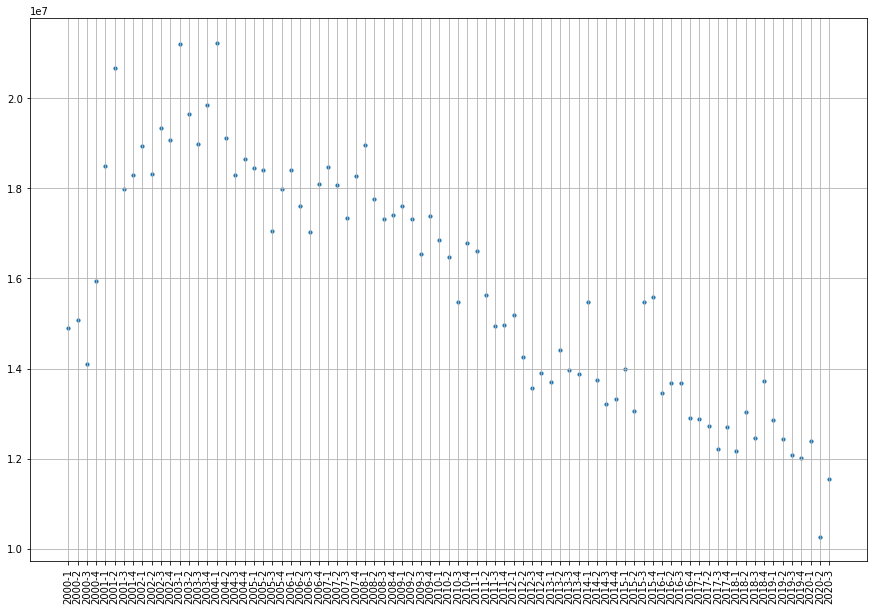

In [217]:
# Representamos los valores de la recaudación para detectar valores extremos y decidir 
# cómo los tratamos
fig = plt.figure(figsize=(15, 10))
plt.xticks(rotation='vertical')
plt.grid()
plt.scatter(df_PRI_PIB['AT'], df_PRI_PIB['REC'],s=10)


Podemos observar varios grupos que aparecen apartados, pero no queda claro que sean puntos extremos. 

Hacemos un análisis boxplot

<AxesSubplot:>

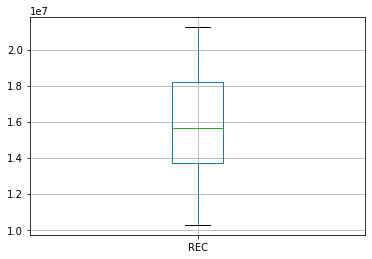

In [221]:
df_PRI_PIB.boxplot("REC")

En este caso no considera valores atípicos 

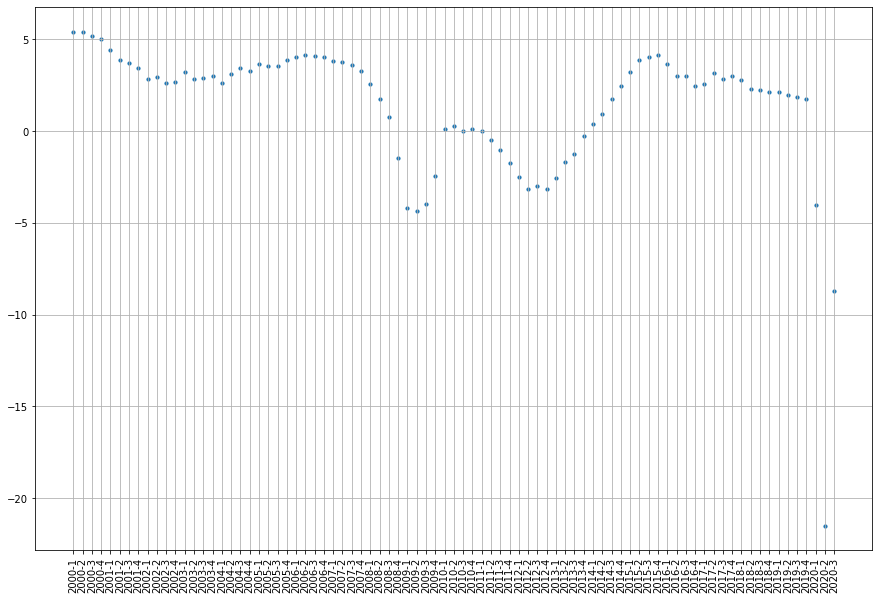

In [218]:
# Representamos los valores del PIB para detectar valores estremos y decidir cómo los tratamos
fig = plt.figure(figsize=(15, 10))
plt.xticks(rotation='vertical')
plt.grid()
plt.scatter(df_PRI_PIB['AT'], df_PRI_PIB['PIB'],s=10)


Podemos ver que a finales de 2008 y principios de 2009 y también a principios del 2020 hay valores extremos. Estos valores no se descartan pues existen con un sentido. Se produjeron por las crisis del 2008 y del COVID-19 respectivamente.

Comprobamos también con una boxplot.

<AxesSubplot:>

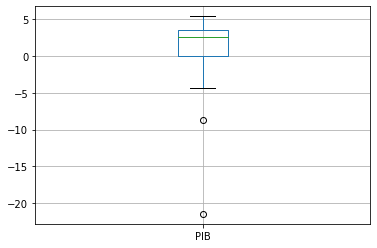

In [220]:
df_PRI_PIB.boxplot("PIB")

Aquí podemos observar dos outliers. Uno alrededor de -8 y otro hacia el -21

In [219]:
# Guardamos el dataset resultado en un csv.
df_PRI_PIB.to_csv('PRI_PIB.csv', index=False, sep=';')

## 4. Análisis de los datos

En este apartado haremos el análisis de nuestro dataset resultado. Tomamos como grupos a analizar los valores del PIB y la recaudación de los sorteos por año y trimestre.

In [164]:
# Vemos las primeras filas del dataset a analizar
df_PRI_PIB.head(5)

,ANIO,TRIM,PIB,REC
116,2000,1,5.38,1.489477e+07
117,2000,2,5.43,1.506711e+07
118,2000,3,5.16,1.410587e+07
119,2000,4,5.02,1.593681e+07
120,2001,1,4.41,1.850650e+07


**Comprobación de la normalidad**
Para ello utilizaremos el test Shapiro-Wilk y también de forma gráfica con histograma

Fuente: https://machinelearningparatodos.com/como-saber-si-una-variable-sigue-una-distribucion-normal-en-python/

Estadisticos=0.959, p=0.009
La muestra no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)


<AxesSubplot:>

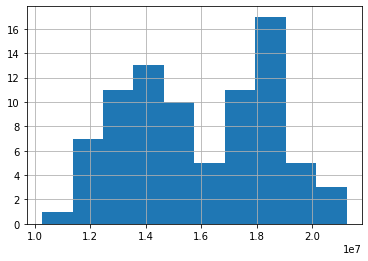

In [228]:
# Comprobación de la normalidad del Recaudación
stat, p = shapiro(df_PRI_PIB['REC'])
print('Estadisticos=%.3f, p=%.3f' % (stat, p))
# Interpretación
alpha = 0.05
if p > alpha:
   print('La muestra parece Gaussiana o Normal (no se rechaza la hipótesis nula H0)')
else:
   print('La muestra no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)')

df_PRI_PIB['REC'].hist()

Estadisticos=0.715, p=0.000
La muestra no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)


<AxesSubplot:>

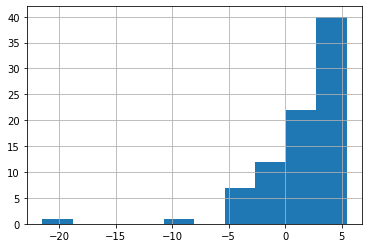

In [227]:
# Comprobación de la normalidad del PIB
stat, p = shapiro(df_PRI_PIB['PIB'])
print('Estadisticos=%.3f, p=%.3f' % (stat, p))
# Interpretación
alpha = 0.05
if p > alpha:
   print('La muestra parece Gaussiana o Normal (no se rechaza la hipótesis nula H0)')
else:
   print('La muestra no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)')

df_PRI_PIB['PIB'].hist()

En ninguno de los dos casos las variables siguen una distribución normal.

Ahora comprobaremos la homocedasticidad. Para ello utilizamos el test Fligner-Killeen.

Fuente: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fligner.html

In [234]:
# Para la recaudación
stat, p = fligner(df_PRI_PIB['REC'],df_PRI_PIB['ANIO'])
print("p-valor",p)

p-valor 1.1404883871033193e-23


In [ ]:
# Para el PIB
stat, p = fligner(df_PRI_PIB['PIB'],df_PRI_PIB['ANIO'])
print("p-valor",p)

En ambos casos da un valor inferior al 0,05 lo cual nos indica que hay variación de la varianza a lo largo del tiempo.

A continuación hacemos las pruebas estadísticas básicas, de regresión y correlación.

In [166]:
# Mostramos las estadísticas descriptivas básicas.
df_PRI_PIB.describe()

,ANIO,TRIM,PIB,REC
count,83.000000,83.000000,83.000000,8.300000e+01
mean,2009.879518,2.481928,1.366867,1.587300e+07
std,6.027169,1.119249,3.741771,2.618920e+06
min,2000.000000,1.000000,-21.500000,1.026409e+07
25%,2005.000000,1.500000,0.065000,1.368353e+07
50%,2010.000000,2.000000,2.650000,1.562836e+07
75%,2015.000000,3.000000,3.555000,1.818591e+07
max,2020.000000,4.000000,5.430000,2.124120e+07


Aquí podemos observar que el PIB tiene una media de 1,36 con una desviación estandard de 3,74. Siendo su valor mínimo de -21,5 y el máximo de 5,43. 

En el caso de la recaudación la media es de 15,87 millones de € con una desviación estandard de 2,62 millones de euros. El mínimo es de 10,26 millones de euros y el máximo de 21, 24 millones de euros

A continuación hacemos un análisis de regresión para las dos variables.


(83, 1)


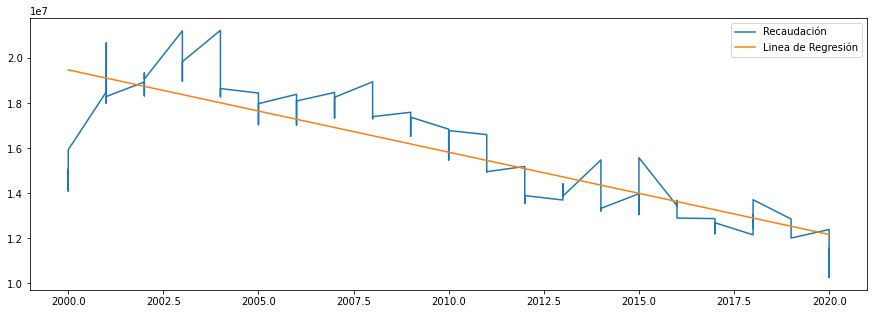

In [262]:
# Creamos el modelo de regresión
regresion_REC = LinearRegression() 

# Entrenamos el modelo con los datos 
# El "reshape" se ha de poner porque si no da error.
# El fit necesita un array de dos dimensiones
X = df_PRI_PIB['ANIO'].array.to_numpy()
X = X.reshape(-1,1)
print(X.shape)
regresion_REC.fit(X, df_PRI_PIB['REC'])

# Hacemos la predicción. Con esto se crea la recta que muestra la tendencia
tendencia_REC = regresion_REC.predict(X) 

# Visualizamos los datos junto a la tendencia calculada con el modelo de regresión
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(X, df_PRI_PIB['REC'], label = 'Recaudación')
ax.plot(X, tendencia_REC, label = 'Linea de Regresión')
plt.legend()

(83, 1)


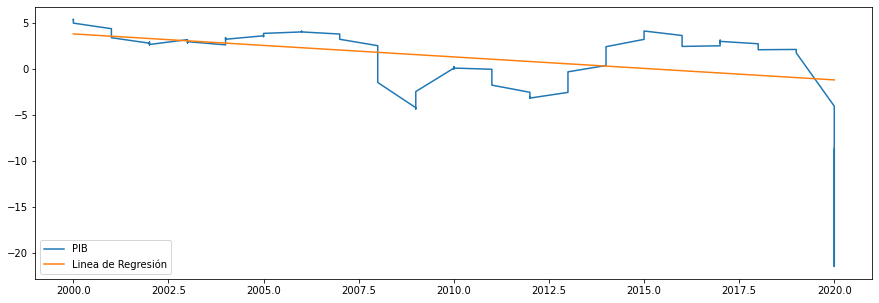

In [264]:
# Creamos el modelo de regresión
regresion_PIB = LinearRegression() 

# Entrenamos el modelo con los datos 
# El "reshape" se ha de poner porque si no da error.
# El fit necesita un array de dos dimensiones
X = df_PRI_PIB['ANIO'].array.to_numpy()
X = X.reshape(-1,1)
print(X.shape)
regresion_PIB.fit(X, df_PRI_PIB['PIB'])

# Hacemos la predicción. Con esto se crea la recta que muestra la tendencia
tendencia_PIB = regresion_PIB.predict(X) 

# Visualizamos los datos junto a la tendencia calculada con el modelo de regresión
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(X, df_PRI_PIB['PIB'], label = 'PIB')
ax.plot(X, tendencia_PIB, label = 'Linea de Regresión')
plt.legend()

Ahora vamos a ver la correlación entre las dos variables: PIB y Recaudación:

<AxesSubplot:>

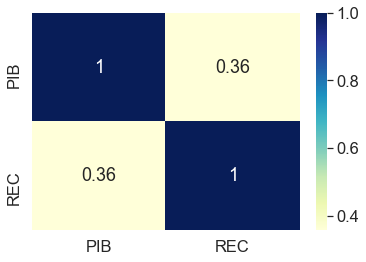

In [291]:
# Nos quedamos con las columnas de PIB y recaudación
datos_reducidos = df_PRI_PIB
datos_reducidos = datos_reducidos.drop(['ANIO','TRIM','AT'], axis=1)

# Calculamos las correlaciones
correlacion = datos_reducidos.corr()
sb.set(font_scale=1.5) # Aumenta el tamaño de letra de los valores de correlación
sb.heatmap(correlacion, annot=True, cmap="YlGnBu")

Con un valor de 0.36, vemos que no existe una gran correlación entre las dos variables.

## 5. Representación de los resultados

In [294]:
# Para poder representar los datos, bajamos la escala de la recaudación para que esté
# en la misma escala que el PIB
datos_recaudacion = datos_reducidos.apply(lambda row: row['REC']/1e6, axis=1)

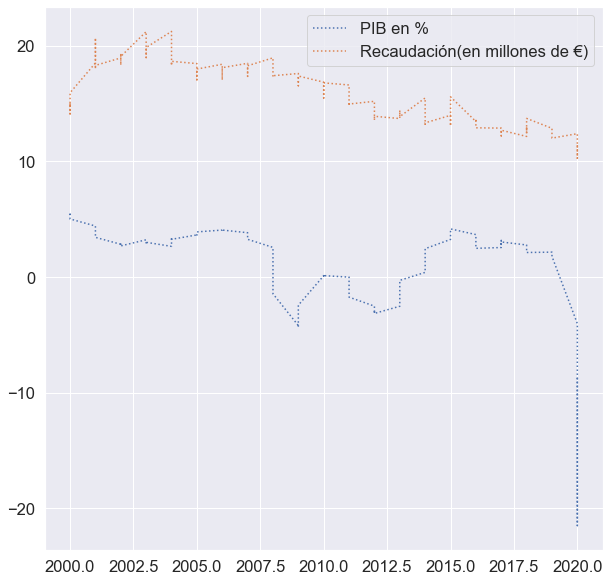

In [308]:
# Visualizamos los datos conjuntamente para ver la relación
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(df_PRI_PIB['ANIO'], datos_reducidos['PIB'], label = 'PIB en %', linestyle = 'dotted')
ax.plot(df_PRI_PIB['ANIO'], datos_recaudacion, label = 'Recaudación(en millones de €)', linestyle = 'dotted')
plt.legend()

Viendo el resultado, podemos concluir que no hay mucha relación entre los datos del PIB y la recaudación de los sorteos de la Primitiva.